In [1]:
from utils import *
from trimesh import *
from optimal import OptimalSWF
from swf import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
subdivs = 11
upper = 4
base = np.linspace(0,(2*np.pi)*((subdivs-1)/subdivs),subdivs)
up = np.linspace(0,(2*np.pi)*((upper-1)/upper),upper)

In [3]:
x_base = np.cos(base)
y_base = np.sin(base)
z_base = np.zeros(x_base.shape)
horiz = np.vstack((x_base,y_base,z_base)).T

In [4]:
x_up = np.cos(up+np.pi/4)
y_up = np.sin(up+np.pi/4)
z_up = np.zeros(x_up.shape)
z_up.fill(np.sqrt(0.5))
overhead = np.vstack((x_up,y_up,z_up)).T
overhead = np.vstack((np.linspace(overhead[0],overhead[1],4),np.linspace(overhead[2],overhead[3],4)))

In [5]:
v = np.vstack((horiz,overhead))
re_idx = [1,10,0,5,6,12,17,3,8,13,16,2,9,11,18,4,7,14,15]
v = v[re_idx]
v_3_0 = v[:3]
v_5_0 = v[:5]
v_5_2 = v[:7]
v_7_4 = v[:11]
v_9_6 = v[:15]
v_11_8 = v

In [6]:
f_3_0 = np.array([[0,1,2]])
f_5_0 = np.array([[0,3,2],[2,3,4],[2,4,1]])
f_5_2 = np.array([[0,5,2],[2,5,6],[2,6,1],[0,3,5],[5,3,6],[6,3,4],[6,4,1]])
f_7_4 = np.array([[0,7,5],[2,0,5],[2,5,6],[2,6,1],[1,6,8],[5,7,9],[6,5,9],[6,9,10],[6,10,8],[7,9,3],
                 [9,10,3],[10,3,4],[10,8,4]])
f_9_6 = np.array([[0,11,13],[0,13,2],[2,13,14],[2,14,1],[1,14,12],[11,13,5],[11,7,5],[13,14,5],[14,5,6],[14,12,6],
                 [12,6,8],[5,7,9],[5,6,9],[6,9,10],[6,8,10],[7,9,3],[9,10,3],[10,3,4],[10,8,4]])
f_11_8 = np.array([[0,13,2],[2,13,14],[2,14,1],[0,11,13],[11,5,13],[5,14,13],[5,6,14],[6,12,14],[14,12,1],[11,7,5],
             [7,9,5],[9,6,5],[9,10,6],[10,8,6],[8,12,6],[7,15,9],[15,17,9],[17,10,9],[17,18,10],[18,16,10],
             [16,8,10],[15,3,17],[3,18,17],[3,4,18],[4,16,18]])

In [9]:
base = Trimesh(v_3_0,f_3_0)
first = base.manual_subdivide(v_5_0,f_5_0)
second = first.manual_subdivide(v_5_2,f_5_2)
third = second.manual_subdivide(v_7_4,f_7_4)
fourth = third.manual_subdivide(v_9_6,f_9_6)
fifth = fourth.manual_subdivide(v_11_8,f_11_8)
meshset = [first,second,third,fourth,fifth]
model = SWF(base,meshset=meshset)

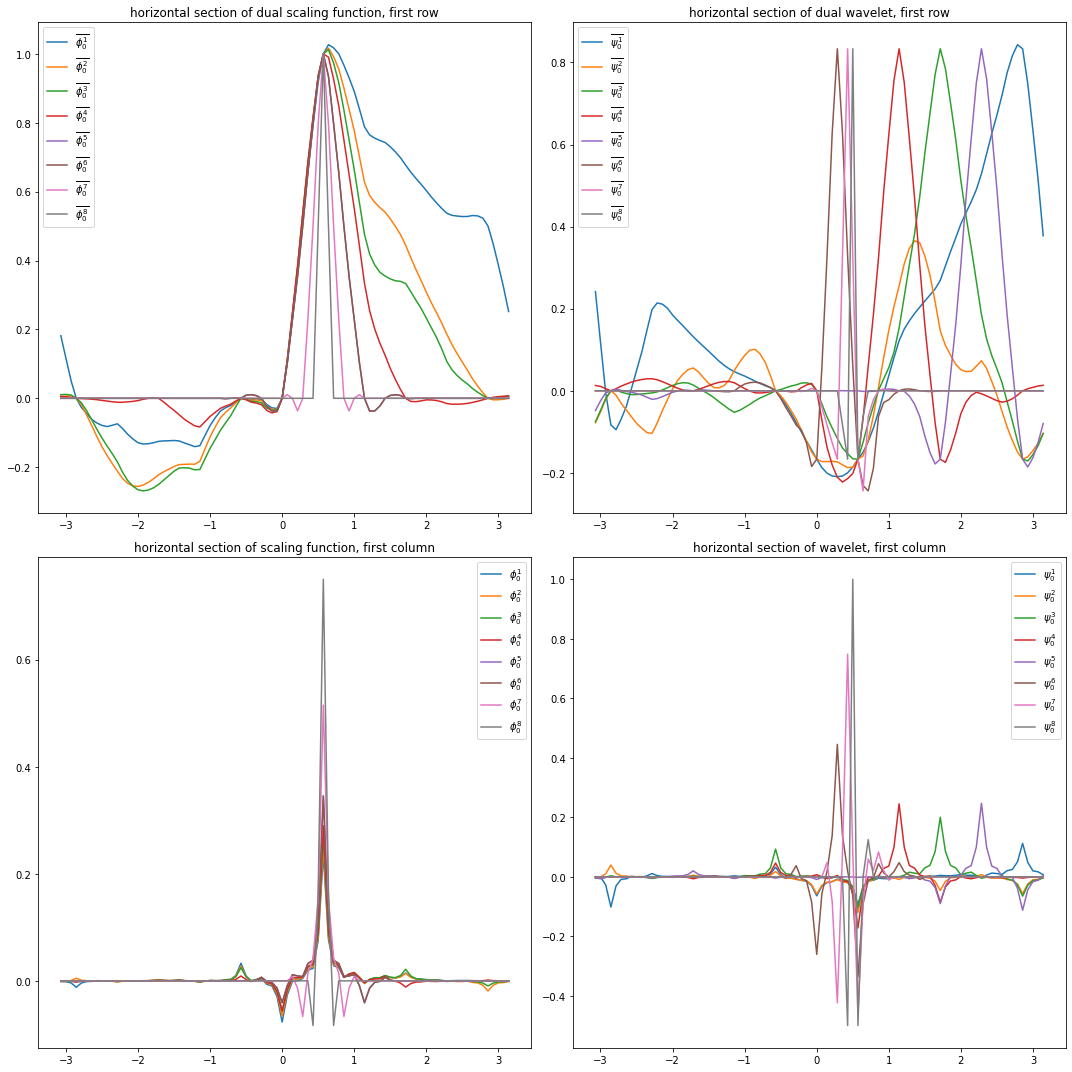

In [10]:
PlotWavelets(model)

In [21]:
model.phi2s[0].shape

(3, 845)

In [29]:
from scipy.optimize import minimize

def f(coeffs,level_to_optimize=0):
    ALPHA, BETA = coeffs
    GAMMA = (1-2*(ALPHA+BETA))/4
    base = Trimesh(v_3_0,f_3_0,ALPHA=ALPHA,BETA=BETA,GAMMA=GAMMA)
    first = base.manual_subdivide(v_5_0,f_5_0)
    second = first.manual_subdivide(v_5_2,f_5_2)
    third = second.manual_subdivide(v_7_4,f_7_4)
    fourth = third.manual_subdivide(v_9_6,f_9_6)
    fifth = fourth.manual_subdivide(v_11_8,f_11_8)
    meshset = [first,second,third,fourth,fifth]
    model = SWF(base,meshset=meshset)
    return cost(model,1,1,level_to_optimize)

coeffs = []
for i in range(6):
    print(i, end='')
    initial_guess = np.array([0.5,0])
    res = minimize(f,initial_guess,i)
    a,b = res.x
    c = (1-2*(a+b))/4
    coeffs.append([a,b,c])

np.array(coeffs)

012345

array([[ 0.62651899,  0.00364209, -0.06508054],
       [ 0.48364751,  0.21776667, -0.10070709],
       [ 0.50633481,  0.13567002, -0.07100241],
       [ 0.54751044,  0.03151054, -0.03951049],
       [ 0.51985894,  0.1007335 , -0.06029622],
       [ 0.52183104,  0.05217115, -0.03700109]])

In [ ]:
np.array(coeffs)